# IMPORT CSV

In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
pd.options.display.max_rows = 200

#### Continue from Scrape - read in CSV

In [770]:
df = pd.read_csv('Jobstreet_Ziig.csv')

In [771]:
jobstreet_df = df.copy()

In [772]:
jobstreet_df = jobstreet_df.reset_index(drop=True)

In [773]:
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

In [774]:
jobstreet_df = jobstreet_df.drop('Requirements', axis=1)

## DATA CLEANING

#### DROP DUPLICATES

In [775]:
jobstreet_df = jobstreet_df.drop_duplicates()

In [776]:
jobstreet_df.describe()

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD
count,1355,1355,1355,1355,1355,1355,1355,1355,1355
unique,429,1135,200,394,51,1316,53,195,1288
top,(Recruitment Firm),Business Analyst,Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),Aboveexpectedsalary,Basic Up To $6000 + VB Experience In Microsoft...
freq,163,36,503,388,740,4,141,313,5


In [777]:
jobstreet_df.isnull().sum()

Company            0
Title              0
Location           0
Address            0
Industry           0
Job Description    0
Seniority          0
Salary             0
JD                 0
dtype: int64

In [778]:
jobstreet_df.head()

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),6000-8000,Responsibilities Responsible for dashboards an...
1,YGP Pte Ltd,Data Analyst,Singapore - Central - Downtown Core - Tanjong ...,79 Anson Road Singapore,Automobile/Automotive Ancillary/Vehicle,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-4000,Application Management\r\n\r\n Register & gath...
2,None,Data Analyst,Singapore - Central,2 Bukit Merah Central Podium #04-00,Wood/Fibre/Paper,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3500-4900,Key Responsibilities Report to the Market Anal...
3,nSearch Global Pte Ltd,Senior Business Analyst - Data Analytics / Pro...,Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,One of Asia-Pacifics leading organizations is ...
4,Adecco Personnel Pte Ltd.,Data Analyst- Pivot Table/ V-Look-up,Singapore - Across Singapore - Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3000-5000,The Opportunity Adecco is partnering with a r...


## Feature Engineering

In [779]:
# Import the regex module
import re

### Job Level Feature

In [780]:
inbracket_pattern = '\((.*?)\)'

In [781]:
re.findall(inbracket_pattern, jobstreet_df['Seniority'].values[0])[0]

'Senior Executive'

In [782]:
def job_level(x):
    if x in ['Junior Executive', 'Entry Level', 'Senior Executive', 'Senior Manager', 'Manager', 'None']:
        return x
    else:
        return re.findall(inbracket_pattern, x)[0]

In [783]:
jobstreet_df['Job Level'] = jobstreet_df['Seniority'].apply(job_level)

In [784]:
jobstreet_df['Job Level'].value_counts()

Senior Executive    497
Junior Executive    399
Manager             214
Entry Level         106
Senior Manager       70
Non-Executive        68
None                  1
Name: Job Level, dtype: int64

### Min years Experience feature

In [785]:
jobstreet_df.Seniority.value_counts()

Min 3 years (Senior Executive)     141
Min 2 years (Junior Executive)     129
Min 5 years (Senior Executive)     127
Min 2 years (Senior Executive)      91
Entry Level                         86
Min 1 year (Junior Executive)       86
Junior Executive                    79
Min 3 years (Junior Executive)      75
Min 5 years (Manager)               72
Min 4 years (Senior Executive)      51
Min 3 years (Manager)               38
Min 1 year (Manager)                27
Senior Executive                    22
Min 4 years (Manager)               21
Senior Manager                      21
Min 1 year (Senior Executive)       19
Min 6 years (Senior Executive)      18
Min 2 years (Non-Executive)         17
Min 5 years (Senior Manager)        16
Min 3 years (Non-Executive)         16
Min 5 years (Non-Executive)         16
Min 1 year (Entry Level)            15
Min 4 years (Junior Executive)      15
Min 2 years (Manager)               14
Min 8 years (Senior Manager)        13
Min 8 years (Senior Execu

In [786]:
jobstreet_df['Seniority'].values[0]

'Min 3 years (Senior Executive)'

In [787]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, jobstreet_df['Seniority'].values[0]))

['3']


In [788]:
def juniorexec_or_entry(x):
    if x == 'Entry Level' or x == 'Junior Executive':
        return 1
    elif x in ['Senior Executive', 'Senior Manager', 'Manager', 'None']:
        return np.nan
    else:
        return int(''.join(re.findall(digits, x)))

In [789]:
# MINIMUM YEARS OF EXPERIENCE FEATURE
jobstreet_df['Min Years Exp'] = jobstreet_df['Seniority'].apply(juniorexec_or_entry)

In [790]:
jobstreet_df['Min Years Exp'].isnull().sum()

56

In [791]:
jobstreet_df['Min Years Exp'].value_counts()

1.0     323
3.0     279
2.0     252
5.0     243
4.0      92
8.0      36
6.0      26
7.0      24
10.0     20
15.0      2
9.0       1
12.0      1
Name: Min Years Exp, dtype: int64

In [792]:
jobstreet_df[jobstreet_df['Min Years Exp'].isnull()]

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Job Level,Min Years Exp
10,DBS Bank Limited,"Senior Associate/Associate, MIS Analyst, Group...",Singapore - Across Singapore - singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operat...,Senior Executive,NaN
12,United Overseas Bank Limited (UOB),"VP, Data Analyst, GTO - (140c50a7-c509-4f92-a)",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,"Proven working experience as a data analyst, w...",Senior Manager,NaN
13,StarHub Ltd,Data Analyst / Scientist - (1800000Q),Singapore - Across Singapore - Singapore,None,Telecommunication,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Anticipates the clients' needs and formulates ...,Senior Executive,NaN
18,United Overseas Bank Limited (UOB),"Data Analyst, Digital Bank - (06d9a2f0-d24e-4d...",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,You will be part of a very vibrant and dynamic...,Senior Manager,NaN
103,"National University of Singapore, Office of Hu...",Data Analyst/Scientist - (008FS),Singapore - Across Singapore - Singapore,None,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,"To assist the Director with the collection, an...",Senior Executive,NaN
118,DBS Bank Limited,"Senior Associate/Associate, Avaloq Support Ana...",Singapore - Across Singapore - singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,Senior Executive,NaN
154,DBS Bank Limited,"Contract Staff (Senior), Business Analyst, Dat...",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,Senior Executive,NaN
163,The HR Ecology Pte Ltd,Data Analyst Intern (3 months) $1500 (Internship),Singapore - Central,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",None,1400-1500,Our Client (A global management consulting fir...,None,NaN
261,Kelly Services (S) Pte Ltd,Credit Documentation Analyst (Private Banking/...,Singapore - Across Singapore - Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Manager,None,My client is a world renowned bank in the glob...,Manager,NaN
264,DBS Bank Limited,"Senior Associate/Associate, Business Analyst -...",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function As the leading bank in Asia...,Senior Executive,NaN


In [793]:
## Impute Min Years Exp for ['Senior Executive', 'Senior Manager', 'Manager', 'None']

jobstreet_df.groupby('Job Level')['Min Years Exp'].mean()

Job Level
Entry Level         1.103774
Junior Executive    2.005013
Manager             4.188119
Non-Executive       3.264706
None                     NaN
Senior Executive    3.774737
Senior Manager      6.775510
Name: Min Years Exp, dtype: float64

In [794]:
## Fix Nans in Min Years Exp for SENIOR EXECUTIVE
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Senior Executive')]

In [795]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 4.0

In [796]:
## Fix Nans in Min Years Exp for SENIOR MANAGER
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Senior Manager')]

In [797]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 7.0

In [798]:
## Fix Nans in Min Years Exp for MANAGER
x = jobstreet_df[(jobstreet_df['Min Years Exp'].isnull())\
             &(jobstreet_df['Job Level'] == 'Manager')]

In [799]:
jobstreet_df.loc[x.index, 'Min Years Exp'] = 4.0

### NO INTERNSHIPS - Take out Internships as they affect the price prediction

In [800]:
interns = jobstreet_df[(jobstreet_df['Title'].str.contains('Intern')) & (
    (jobstreet_df.Seniority == 'Entry Level') | (jobstreet_df.Seniority == 'None'))]

In [801]:
jobstreet_df.drop(interns.index, axis=0, inplace=True)

In [802]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 2553
Data columns (total 11 columns):
Company            1347 non-null object
Title              1347 non-null object
Location           1347 non-null object
Address            1347 non-null object
Industry           1347 non-null object
Job Description    1347 non-null object
Seniority          1347 non-null object
Salary             1347 non-null object
JD                 1347 non-null object
Job Level          1347 non-null object
Min Years Exp      1347 non-null float64
dtypes: float64(1), object(10)
memory usage: 126.3+ KB


### Fix Title - Base Titles (DS, DA, BA, BI etc)

#### Create the Base Title Feature

In [803]:
jobstreet_df.Title.value_counts()

Business Analyst                                                                                                            36
Data Scientist                                                                                                              19
Data Analyst                                                                                                                11
Business Development Manager                                                                                                 5
Recruitment Consultant                                                                                                       5
IT Business Analyst                                                                                                          5
Data Engineer                                                                                                                5
URGENT: Business Analyst (Changi, SAP, MNC)                                                                    

In [804]:
def base_title(x):
    if 'data scientist' in x.lower():
        return 'DS'
    elif 'data science' in x.lower():
        return 'DS'
    elif 'machine learning' in x.lower():
        return 'DS'
    elif 'data analytics' in x.lower():
        return 'DA'
    elif 'data analysis' in x.lower():
        return 'DA'
    elif 'data analyst' in x.lower():
        return 'DA'
    elif 'data engineer' in x.lower():
        return 'DE'
    elif 'business analyst' in x.lower():
        return 'BA'
    elif 'business analytics' in x.lower():
        return 'BA'
    elif 'business intelligent' in x.lower():
        return 'BI'
    elif 'business intelligence' in x.lower():
        return 'BI'
    elif 'bi analyst' in x.lower():
        return 'BI'
    elif 'scientist' in x.lower():
        return 'RS'  # Research Scientist
    elif 'data architect' in x.lower():
        return 'DArch'  # Data Architect
    else:
        return 'OTHER'

In [805]:
jobstreet_df['Base Title'] = jobstreet_df['Title'].apply(base_title)

In [806]:
jobstreet_df['Base Title'].value_counts()

OTHER    786
BA       250
DA       135
DS        67
RS        54
BI        43
DE         9
DArch      3
Name: Base Title, dtype: int64

In [807]:
jobstreet_df['Base Title'].value_counts(
)/jobstreet_df['Base Title'].value_counts().sum()

OTHER    0.583519
BA       0.185598
DA       0.100223
DS       0.049740
RS       0.040089
BI       0.031923
DE       0.006682
DArch    0.002227
Name: Base Title, dtype: float64

In [808]:
jobstreet_df[jobstreet_df['Base Title'] == 'DS']

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Job Level,Min Years Exp,Base Title
94,M1 Limited,Senior/Data Analyst (Data Science Team),Singapore - West,10 International Business Park Singapore 609928,Telecommunication,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Senior Executive),Aroundexpectedsalary,Job ResponsibilitiesWork closely with the data...,Senior Executive,2.0,DS
147,Building and Construction Authority (BCA),Data Analyst / Data Scientist (Economic Resear...,Singapore - Central,"52 Jurong Gateway Road, #11-01, Singapore 608550",Government/Defence,"<div class=""unselectable wrap-text"" id=""job_de...",Min 1 year (Junior Executive),Aroundexpectedsalary,ResponsibilitiesYou will help to identify valu...,Junior Executive,1.0,DS
152,HRnet One Pte Ltd,Data And Research Analyst (Data Scientist),Singapore - Central,391A Orchard Road #23-06 Ngee Ann City Tower A,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),5500-7000,Responsibilities Conduct research in the areas...,Senior Executive,3.0,DS
201,(Recruitment Firm),Data Scientist / Analyst ( UP $7K/ JURONG/ PhD...,Singapore - West,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Manager),6000-7000,UP $7K / MNC Jurong Area AWS + BONUS PHD / Mas...,Manager,2.0,DS
784,"National University of Singapore, Office of Hu...",Data Scientist - (008J6),Singapore - Across Singapore - Singapore,None,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,None,1. Work with Industry Partners in Challenging ...,Entry Level,1.0,DS
785,(Recruitment Firm),Data Scientist,Singapore - Across Singapore - Singapore,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,6000-10000,about the companyOur client is expanding their...,Junior Executive,1.0,DS
791,United Overseas Bank Limited (UOB),"VP/AVP, Data Scientist, Big Data Analytics Gro...",Singapore - Across Singapore - Singapore,None,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,TheData Management Office (DMO)is a business f...,Senior Executive,5.0,DS
794,MBA Michael Bailey Associates Pte Ltd,Data Scientist x2,Singapore - Central - Queenstown,None,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Non-Executive),4500-6000,"Responsible for applying Data Science, i.e. Ma...",Non-Executive,3.0,DS
795,RGF Talent Solutions Singapore Pte Ltd,Machine Learning Engineer/ Data Scientist (JO-...,Singapore - Across Singapore,71 Robinson Road Singapore #0504 Singapore 068895,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Senior Executive),Aboveexpectedsalary,About The ClientOur cliennt is leading Ad Netw...,Senior Executive,2.0,DS
796,Medtronic,Senior Supply Chain Data Scientist,Singapore - East - Pasir Ris,"50 Pasir Panjang Rd, Singapore 117440",Healthcare/Medical,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),4000-5000,The Data Scientist will be responsible for des...,Senior Executive,3.0,DS


### Fix Location

In [809]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [810]:
aus = jobstreet_df[jobstreet_df['Location']
                   == 'Australia - Across Australia']  # WTF

In [811]:
jobstreet_df.drop(aus.index, axis=0, inplace=True)

In [812]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - Central - Kallang - Kallang                          

In [813]:
thai = jobstreet_df[jobstreet_df['Location']
                    == 'Thailand - Bangkok']  # WTF NOPE

In [814]:
jobstreet_df.drop(thai.index, axis=0, inplace=True)

In [815]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [816]:
not_in_sg = jobstreet_df[~jobstreet_df['Location'].str.contains(
    'Singapore|None')]

In [817]:
jobstreet_df.drop(not_in_sg.index, axis=0, inplace=True)

In [818]:
jobstreet_df['Location'].value_counts()

Singapore - Central                                                              501
Singapore - Across Singapore                                                     168
Singapore - Across Singapore - Singapore                                         140
Singapore - West                                                                 132
Singapore - East                                                                  45
Singapore - North-East                                                            27
None                                                                              15
Singapore - Central - Downtown Core                                               13
Singapore - North                                                                 12
Singapore - Central - Downtown Core - Cityhall                                     9
Singapore - East - Paya Lebar                                                      9
Singapore - Central - Kallang - Kallang                          

In [819]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 2553
Data columns (total 12 columns):
Company            1338 non-null object
Title              1338 non-null object
Location           1338 non-null object
Address            1338 non-null object
Industry           1338 non-null object
Job Description    1338 non-null object
Seniority          1338 non-null object
Salary             1338 non-null object
JD                 1338 non-null object
Job Level          1338 non-null object
Min Years Exp      1338 non-null float64
Base Title         1338 non-null object
dtypes: float64(1), object(11)
memory usage: 135.9+ KB


### !!!! PITSTOP !!!! - to_csv('Jobstreet_Ziig_FEng') prev, now Jobstreet_Ziig_FEng_1338

In [820]:
jobstreet_df.to_csv('Jobstreet_Ziig_FEng_1338.csv')

In [821]:
jobstreet_df = pd.read_csv('Jobstreet_Ziig_FEng_1338.csv')

In [822]:
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

### Clean Up Address

In [823]:
mask = (jobstreet_df['Address'].str.len() < 5)
df = jobstreet_df.loc[mask]

In [824]:
df.Address.value_counts()

None    380
-        15
CBD       2
.         1
Name: Address, dtype: int64

In [825]:
def address_to_null(x):
    if x in ['None', '-', '.']:
        return np.nan  # Replace with NaNs
    else:
        return x

In [826]:
jobstreet_df['Address'] = jobstreet_df['Address'].apply(address_to_null)

In [827]:
jobstreet_df['Address'].value_counts()

8 Marina View #11-01 Asia Square Tower 1 Singapore 018960                                                              108
8 Marina View, #11-01 Asia Square Tower 1, Singapore 018960                                                             43
1 Fusionopolis Way Singapore #21-01 Connexis (South Tower) Singapore 138632                                             39
6 Shenton Way Tower 1 #39-03 Singapore 068809                                                                           36
391A Orchard Road #12-08 Ngee Ann City Tower A S(238873)                                                                19
One Raffles Place Tower 2 #09-61 Singapore 048616                                                                       18
8 Marina View, #11-01, Asia Square Tower 1 Singapore 018960                                                             17
Singapore                                                                                                               15
7500A Beach Road

### Clean up Base Title

In [828]:
# EXTRACT MORE BASE TITLES

In [829]:
ActuallyDA = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                          & (jobstreet_df['JD'].str.contains('Data Analyst'))
                          & (jobstreet_df['Base Title'] == 'OTHER')]

In [830]:
jobstreet_df.iloc[ActuallyDA.index, df.columns.get_loc('Base Title')] = 'DA'

In [831]:
jobstreet_df.iloc[ActuallyDA.index, df.columns.get_loc('Base Title')]

109    DA
769    DA
Name: Base Title, dtype: object

In [832]:
# DROP COZ WE DONT NEED MORE OF THESE ENTRIES (10 of them)
ToDrop = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                      & (jobstreet_df['JD'].str.contains('Business Analyst'))
                      & (jobstreet_df['Base Title'] == 'OTHER')]  # ['JD'].values

In [833]:
ToDrop.index

Int64Index([290, 317, 385, 654, 661, 705, 779, 834, 835, 839], dtype='int64')

In [834]:
jobstreet_df.drop(ToDrop.index, axis=0, inplace=True)

In [835]:
jobstreet_df['Base Title'].value_counts()

OTHER    767
BA       250
DA       137
DS        66
RS        54
BI        43
DE         8
DArch      3
Name: Base Title, dtype: int64

#### CHECK RESEARCH SCIENTIST AND REASSIGN, DROP THOSE TOO SPECIALIZED

In [836]:
comList = ['Institute for Infocomm Research', 'Singapore Management University', 'None',
           'SINGAPORE VCYBER TECHNOLOGY PTE LTD', 'National University of Singapore, Office of Human Resources']

In [837]:
pattern = '|'.join(comList)

In [838]:
ToDrop = jobstreet_df[(jobstreet_df['Base Title'] == 'RS') & (
    ~jobstreet_df['Company'].str.contains(pattern))]

In [839]:
jobstreet_df.drop(ToDrop.index, axis=0, inplace=True)

#### Fix those job roles who are actually DS

In [840]:
ActuallyDS = jobstreet_df[(jobstreet_df['Base Title'] == 'RS') & (
    jobstreet_df['Company'].str.contains(pattern))]

In [841]:
jobstreet_df['Base Title'] = jobstreet_df['Base Title'].apply(
    lambda x: 'DS' if x == 'RS' else x)

In [842]:
# /jobstreet_df['Base Title'].value_counts().sum()
jobstreet_df['Base Title'].value_counts()

OTHER    767
BA       250
DA       137
DS       105
BI        43
DE         8
DArch      3
Name: Base Title, dtype: int64

In [843]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 1337
Data columns (total 12 columns):
Company            1313 non-null object
Title              1313 non-null object
Location           1313 non-null object
Address            928 non-null object
Industry           1313 non-null object
Job Description    1313 non-null object
Seniority          1313 non-null object
Salary             1313 non-null object
JD                 1313 non-null object
Job Level          1313 non-null object
Min Years Exp      1313 non-null float64
Base Title         1313 non-null object
dtypes: float64(1), object(11)
memory usage: 133.4+ KB


In [844]:
#jobstreet_df[(jobstreet_df['Base Title'] == 'OTHER')&(jobstreet_df['Title'].str.contains('data|DATA|Data|Analytics'))]['Title'].value_counts()

### !!!! PITSTOP !!!! - BACK UP CSV

In [845]:
# BACK UP
jobstreet_df.to_csv('Jobstreet_Ziig_FEng_1313_354pm.csv')

### CONTINUE ON 

### REMOVE Base Title = OTHER

In [846]:
jobstreet_df = pd.read_csv('Jobstreet_Ziig_FEng_1313_354pm.csv')
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)

In [847]:
other = jobstreet_df[jobstreet_df['Base Title'] == 'OTHER']

In [848]:
jobstreet_df = jobstreet_df.drop(other.index, axis=0)

In [849]:
jobstreet_df['Base Title'].value_counts(
)/jobstreet_df['Base Title'].value_counts().sum()*100

BA       45.787546
DA       25.091575
DS       19.230769
BI        7.875458
DE        1.465201
DArch     0.549451
Name: Base Title, dtype: float64

In [850]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 1295
Data columns (total 12 columns):
Company            546 non-null object
Title              546 non-null object
Location           546 non-null object
Address            381 non-null object
Industry           546 non-null object
Job Description    546 non-null object
Seniority          546 non-null object
Salary             546 non-null object
JD                 546 non-null object
Job Level          546 non-null object
Min Years Exp      546 non-null float64
Base Title         546 non-null object
dtypes: float64(1), object(11)
memory usage: 55.5+ KB


### Fix Salary

In [851]:
jobstreet_df.Salary.value_counts()

Aboveexpectedsalary     155
Aroundexpectedsalary     52
None                     48
4000-5000                17
Belowexpectedsalary      16
5000-7000                15
3000-3500                12
4000-6000                 9
5500-7500                 9
4000-5600                 8
3000-4500                 8
3000-5000                 8
3000-4000                 7
4500-5500                 7
4500-6000                 6
6000-7500                 6
3500-5000                 6
6000-8000                 5
4000-4500                 5
3500-4500                 5
5000-6000                 4
4000-5500                 4
3500-4000                 4
4500-6500                 4
6000-8500                 4
4000-7000                 4
2500-3500                 4
2500-3200                 4
9000-12000                4
3500-4900                 3
5500-7000                 3
4500-5000                 3
3000-4200                 3
6000-10000                2
4000-5200                 2
6000-7000           

In [852]:
jobstreet_df.drop(jobstreet_df[jobstreet_df.Salary ==
                               'MYR15000-MYR25000'].index, axis=0, inplace=True)

In [853]:
jobstreet_df.drop(
    jobstreet_df[jobstreet_df.Salary == '375-417'].index, axis=0, inplace=True)

In [854]:
# FIX Salary
# EXPECTED SALARY = 4000
# AROUND EXPECTED SALARY = 4000 --> 3750-4250 Aroundexpectedsalary
# ABOVE EXPECTED SALARY = 4000 + 1K --> 4750-5250 Aboveexpectedsalary
# BELOW EXPECTED SALARY = 4000 - 1K --> 2750-3250 Belowexpectedsalary

In [855]:
# SPLIT SALARY INTO MIN AND MAX FEATURES, THEN EVENTUALLY CALCULATE MEAN
## IMPUTE SALARY

In [856]:
def fix_sal_min(x):
    if x == 'Aroundexpectedsalary':
        return 4000.0
    elif x == 'Aboveexpectedsalary':
        return 4750.0
    elif x == 'Belowexpectedsalary':
        return 2750.0
    elif x == 'None':
        return x
    else:
        new_min = float(x.split('-')[0])
        if new_min > 10000:  # eyeball from value_counts()
            return new_min/12
        else:
            return new_min

In [857]:
def fix_sal_max(x):
    if x == 'Aroundexpectedsalary':
        return 4250.0
    elif x == 'Aboveexpectedsalary':
        return 5250.0
    elif x == 'Belowexpectedsalary':
        return 3250.0
    elif x == 'None':
        return x
    else:
        #print x
        new_max = float(x.split('-')[1])
        if new_max > 12600:  # eyeball from value_counts()
            return new_max/12
        else:
            return new_max

In [858]:
jobstreet_df['Min Sal'] = jobstreet_df['Salary'].apply(fix_sal_min)

In [859]:
jobstreet_df['Max Sal'] = jobstreet_df['Salary'].apply(fix_sal_max)

### Impute 'None' Salary

In [860]:
jobstreet_df[jobstreet_df.Salary == 'None']

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Job Level,Min Years Exp,Base Title,Min Sal,Max Sal
10,DBS Bank Limited,"Senior Associate/Associate, MIS Analyst, Group...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operat...,Senior Executive,4.0,DA,None,None
11,United Overseas Bank Limited (UOB),"VP, Data Analyst, GTO - (140c50a7-c509-4f92-a)",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,"Proven working experience as a data analyst, w...",Senior Manager,7.0,DA,None,None
12,StarHub Ltd,Data Analyst / Scientist - (1800000Q),Singapore - Across Singapore - Singapore,NaN,Telecommunication,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Anticipates the clients' needs and formulates ...,Senior Executive,4.0,DA,None,None
17,United Overseas Bank Limited (UOB),"Data Analyst, Digital Bank - (06d9a2f0-d24e-4d...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Manager,None,You will be part of a very vibrant and dynamic...,Senior Manager,7.0,DA,None,None
58,"National University of Singapore, Office of Hu...",Data Analyst/Scientist - (008FS),Singapore - Across Singapore - Singapore,NaN,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,"To assist the Director with the collection, an...",Senior Executive,4.0,DA,None,None
71,Kelly Services (S) Pte Ltd,"Data Analyst (Finance, contract)",Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,Responsibilities Ability to work with big dat...,Junior Executive,1.0,DA,None,None
73,DBS Bank Limited,"Senior Associate/Associate, Avaloq Support Ana...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,Senior Executive,4.0,DA,None,None
83,(Recruitment Firm),Senior Data Analyst (Banking),Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,about the company This banking client is on...,Junior Executive,1.0,DA,None,None
89,DBS Bank Limited,"Contract Staff (Senior), Business Analyst, Dat...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operati...,Senior Executive,4.0,BA,None,None
93,Ambition Group Singapore Pte. Ltd. (SG),CDD KYC Data Analyst,Singapore - Across Singapore - Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Junior Executive,None,Our client is a well-established Global Bank w...,Junior Executive,1.0,DA,None,None


In [861]:
# SENIOR EXECUTIVE + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4161.458333
# Max Sal    5151.041667

Min Sal    4161.458333
Max Sal    5151.041667
dtype: float64

In [862]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([10, 12, 58, 73], dtype='int64')

In [863]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4161.458333
jobstreet_df.loc[x.index, 'Max Sal'] = 5151.041667

In [864]:
# SENIOR MANAGER + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal     9000.0
# Max Sal    12000.0

Min Sal     9000.0
Max Sal    12000.0
dtype: float64

In [865]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([11, 17], dtype='int64')

In [866]:
jobstreet_df.loc[x.index, 'Min Sal'] = 9000.0
jobstreet_df.loc[x.index, 'Max Sal'] = 12000.0

In [867]:
# JUNIOR EXECUTIVE + DA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'DA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    3621.794872
# Max Sal    4589.743590

Min Sal    3621.794872
Max Sal    4589.743590
dtype: float64

In [868]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'DA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([71, 83, 93, 111, 129], dtype='int64')

In [869]:
jobstreet_df.loc[x.index, 'Min Sal'] = 3621.794872
jobstreet_df.loc[x.index, 'Max Sal'] = 4589.743590

In [870]:
# SENIOR EXECUTIVE + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4390.254237
# Max Sal    5536.440678

Min Sal    4390.254237
Max Sal    5536.440678
dtype: float64

In [871]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Executive')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([89, 153, 323, 642, 680, 717], dtype='int64')

In [872]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4390.254237
jobstreet_df.loc[x.index, 'Max Sal'] = 5536.440678

In [873]:
# JUNIOR EXECUTIVE + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    3803.968254
# Max Sal    4657.666667

Min Sal    3803.968254
Max Sal    4657.666667
dtype: float64

In [874]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([160, 614, 712, 718, 722, 759, 768, 786, 792, 806, 807], dtype='int64')

In [875]:
jobstreet_df.loc[x.index, 'Min Sal'] = 3803.968254
jobstreet_df.loc[x.index, 'Max Sal'] = 4657.666667

In [876]:
# SENIOR MANAGER + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    5125.0
# Max Sal    6125.0

Min Sal    5125.0
Max Sal    6125.0
dtype: float64

In [877]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([240, 720], dtype='int64')

In [878]:
jobstreet_df.loc[x.index, 'Min Sal'] = 5125.0
jobstreet_df.loc[x.index, 'Max Sal'] = 6125.0

In [879]:
# MANAGER + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4538.461538
# Max Sal    5834.615385

Min Sal    4538.461538
Max Sal    5834.615385
dtype: float64

In [880]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([632, 697, 1295], dtype='int64')

In [881]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4538.461538
jobstreet_df.loc[x.index, 'Max Sal'] = 5834.615385

In [882]:
# SENIOR MANAGER + DArch MIN MAX (NO BASE TITLE REFERENCE, SO USE INDUSTRY)
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Industry'] == 'Education')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4562.5
# Max Sal    5937.5

Min Sal    4562.5
Max Sal    5937.5
dtype: float64

In [883]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Industry'] == 'Education')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([562, 1085], dtype='int64')

In [884]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4562.5
jobstreet_df.loc[x.index, 'Max Sal'] = 5937.5

In [885]:
# SENIOR MANAGER + DE MIN MAX (NO BASE TITLE REFERENCE, SO USE INDUSTRY) - Banking/Financial Services
jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
             & (jobstreet_df['Industry'] == 'Banking/Financial Services')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    7062.5
# Max Sal    9062.5

Min Sal    7062.5
Max Sal    9062.5
dtype: float64

In [886]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Senior Manager')
                 & (jobstreet_df['Industry'] == 'Banking/Financial Services')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([338, 477, 962], dtype='int64')

In [887]:
jobstreet_df.loc[x.index, 'Min Sal'] = 7062.5
jobstreet_df.loc[x.index, 'Max Sal'] = 9062.5

In [888]:
# JUNIOR EXECUTIVE + BI MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'BI')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4000.0
# Max Sal    5275.0

Min Sal    4000.0
Max Sal    5275.0
dtype: float64

In [889]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'BI')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([866], dtype='int64')

In [890]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4000
jobstreet_df.loc[x.index, 'Max Sal'] = 5275

In [891]:
# JUNIOR EXECUTIVE + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4977.272727
# Max Sal    6950.000000

Min Sal    4977.272727
Max Sal    6950.000000
dtype: float64

In [892]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Junior Executive')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([488, 508, 529, 536, 563], dtype='int64')

In [893]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4977.272727
jobstreet_df.loc[x.index, 'Max Sal'] = 6950.000000

In [894]:
# ENTRY LEVEL + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    4383.333333
# Max Sal    5433.333333

Min Sal    4383.333333
Max Sal    5433.333333
dtype: float64

In [895]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([467], dtype='int64')

In [896]:
jobstreet_df.loc[x.index, 'Min Sal'] = 4383.333333
jobstreet_df.loc[x.index, 'Max Sal'] = 5433.333333

In [897]:
# ENTRY LEVEL + BA MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
             & (jobstreet_df['Base Title'] == 'BA')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    2900.000000
# Max Sal    3676.666667

Min Sal    2900.000000
Max Sal    3676.666667
dtype: float64

In [898]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Entry Level')
                 & (jobstreet_df['Base Title'] == 'BA')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([399, 695], dtype='int64')

In [899]:
jobstreet_df.loc[x.index, 'Min Sal'] = 2900.000000
jobstreet_df.loc[x.index, 'Max Sal'] = 3676.666667

In [900]:
# MANAGER + DS MIN MAX
jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
             & (jobstreet_df['Base Title'] == 'DS')
             & (jobstreet_df['Min Sal'] != 'None')
             & (jobstreet_df['Max Sal'] != 'None')][['Min Sal', 'Max Sal']].mean()

# Min Sal    5048.461538
# Max Sal    6076.923077

Min Sal    5048.461538
Max Sal    6076.923077
dtype: float64

In [901]:
x = jobstreet_df[(jobstreet_df['Job Level'] == 'Manager')
                 & (jobstreet_df['Base Title'] == 'DS')
                 & (jobstreet_df['Min Sal'] == 'None')
                 & (jobstreet_df['Max Sal'] == 'None')]

x.index

Int64Index([490], dtype='int64')

In [902]:
jobstreet_df.loc[x.index, 'Min Sal'] = 5048.461538
jobstreet_df.loc[x.index, 'Max Sal'] = 6076.923077

### Create Mean Sal feature - Mean Salary

In [903]:
jobstreet_df['Mean Sal'] = (
    jobstreet_df['Min Sal'] + jobstreet_df['Max Sal'])/2

### FIX Job Description -> Output in 'JD' col

In [904]:
from bs4 import BeautifulSoup

In [905]:
jobstreet_df['Job Description'].values[0]

'<div class="unselectable wrap-text" id="job_description"> <div><div>Responsibilities</div><ul><li>Responsible for dashboards and reports on campaigns ROI analysis\xc2\xa0</li><li>Manage data analytics requests from regional team</li><li>Responsible for weekly run rate analysis, insights and trends on lead, opportunity and pipeline creation\xc2\xa0</li><li>Analyse customer behaviour on optimizing programs for meeting ROI\xc2\xa0</li></ul><div><br/>Requirements</div><ul><li>Degree in IT/ System engineering / Business / Marketing related\xc2\xa0</li><li>3 yeears experience into data analysis\xc2\xa0</li><li>Experience in database (SQL, Schema design)</li><li>Advanced spreadsheet and process documentation skills</li><li>Experience with structured and unstructred data analysis\xc2\xa0</li></ul><div>Location: CBD\xc2\xa0<br/>5 working days, Mon \xe2\x80\x93 Fri\xc2\xa0<br/>Salary range: $7K<br/>MNC</div><div><br/>Competitive remuneration package will be offered to the shortlisted candidate.

In [906]:
def fix_jd(req):
    raw = str(req).replace(':', ' ')\
        .replace('<br/>', ' ')\
        .replace('<li>', ' <li> ')\
        .replace('</li>', ' </li> ')\
        .replace('<strong>', ' ')\
        .replace('</strong>', ' ')\
        .replace('<p>', ' ')\
        .replace('</p>', ' ')\
        .replace('<em>', ' ')\
        .replace('</em>', ' ')\
        .replace('.', ' ')\
        .replace('(', ' ')\
        .replace(')', ' ')\
        .replace('\xa0', ' ')\
        .replace('\xc2', ' ')\
        .replace('@', ' ')\
        .replace('\n', ' ')\
        .replace('\t', ' ')\
        .replace('-', ' ')\
        .replace('</div>', '  </div>')\

    soup = BeautifulSoup(raw.decode('utf-8', 'ignore'), 'lxml')

    job_desc_text = []
    for i in soup.find_all('div'):
        job_desc_text.append(''.join(i.text).strip())
       # print(''.join(i.text).strip())

    out = ' '.join(set(job_desc_text))  # Unique
    #out = ''.join(job_desc_text)
    return out.encode('utf-8')

In [907]:
#fix_jd(jobstreet_df['Job Description'].values[3])

In [908]:
jobstreet_df['JD'] = jobstreet_df['Job Description'].apply(fix_jd)

In [909]:
jobstreet_df['Industry'].value_counts()

Human Resources Management/Consulting                320
R&D                                                   49
Banking/Financial Services                            27
Education                                             15
Computer/Information Technology (Software)            15
Semiconductor/Wafer Fabrication                       10
Telecommunication                                      8
Healthcare/Medical                                     8
Manufacturing/Production                               8
Consulting (Business & Management)                     7
Consulting (IT, Science, Engineering & Technical)      6
Government/Defence                                     5
Aerospace/Aviation/Airline                             5
Electrical & Electronics                               5
Others                                                 5
Computer/Information Technology (Hardware)             4
Property/Real Estate                                   4
Transportation/Logistics       

In [910]:
#jobstreet_df[(jobstreet_df['Industry']=='Human Resources Management/Consulting')]['JD'].values

In [911]:
jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
             & (jobstreet_df['JD'].str.contains('Automobile|automotive'))]['JD'].values

array([" Profile Description As a successful candidate, you will have a PhD or a masters degree in applied statistics or a relevant field back by at least 5 years of experience as a data scientist  You should have had hands on experience in Machine Learning tools such as R, MATLAB or relevant tools  You will also have hands on exposure with Big Data tools such as Hadoop and BI tools such as Tableau  You will also be comfortable with SQL database as well as Java and/or C++ programming Job Offer An exciting opportunity to join a leading manufacturing organisation as their Data Analyst  IoT An exciting opportunity to join a leading manufacturing organisation as their Data Analyst  IoT      Client Details    Our client is a leading manufacturing company in the automotive industry  They have recently setup an innovation lab and are rolling out initiatives to develop smart manufacturing solutions and as such, they are looking for a high calibre Data Analyst to join their team     Description

#### Fix Industry - Automobile/Automotive Ancillary/Vehicle

In [912]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('automotive'))]

In [913]:
jobstreet_df.loc[x.index,
                 'Industry'] = 'Automobile/Automotive Ancillary/Vehicle'

#### Fix Industry - Consumer Products/FMCG 

In [914]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('FMCG'))]

In [915]:
jobstreet_df.loc[x.index, 'Industry'] = 'Consumer Products/FMCG'

#### Fix Industry - Computer/Information Technology (Software)

In [916]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('IT Industry'))]

In [917]:
jobstreet_df.loc[x.index,
                 'Industry'] = 'Computer/Information Technology (Software)'

#### Fix Industry - Hotel/Hospitality

In [918]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('hotel|hospitality'))]

In [919]:
jobstreet_df.loc[x.index, 'Industry'] = 'Hotel/Hospitality'

#### Fix Industry - Healthcare/Medical

In [920]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('Healthcare|healthcare'))]

In [921]:
jobstreet_df.loc[x.index, 'Industry'] = 'Healthcare/Medical'

#### Fix Industry - Transportation/Logistics

In [922]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('logistics'))]

In [923]:
jobstreet_df.loc[x.index, 'Industry'] = 'Transportation/Logistics'

#### Fix Industry - Education

In [924]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('Education'))]

In [925]:
jobstreet_df.loc[x.index, 'Industry'] = 'Education'

#### Fix Indsutry - Banking/Financial Services  

In [926]:
x = jobstreet_df[(jobstreet_df['Industry'] == 'Human Resources Management/Consulting')
                 & (jobstreet_df['JD'].str.contains('bank|banking'))]

In [927]:
jobstreet_df.loc[x.index, 'Industry'] = 'Banking/Financial Services'

## !!!! PITSTOP !!! - DATA CHECK & BACK UP BEFORE MODEL

In [928]:
jobstreet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1295
Data columns (total 15 columns):
Company            544 non-null object
Title              544 non-null object
Location           544 non-null object
Address            381 non-null object
Industry           544 non-null object
Job Description    544 non-null object
Seniority          544 non-null object
Salary             544 non-null object
JD                 544 non-null object
Job Level          544 non-null object
Min Years Exp      544 non-null float64
Base Title         544 non-null object
Min Sal            544 non-null object
Max Sal            544 non-null object
Mean Sal           544 non-null object
dtypes: float64(1), object(14)
memory usage: 88.0+ KB


In [929]:
jobstreet_df.to_csv('Jobstreet_120am.csv')

## Model Prep

In [930]:
## Read in CSV
jobstreet_df = pd.read_csv('Jobstreet_120am.csv')

#### Load Data from Last Stop

In [931]:
jobstreet_df = jobstreet_df.reset_index(drop=True)
jobstreet_df = jobstreet_df.drop('Unnamed: 0', axis=1)
jobstreet_df

,Company,Title,Location,Address,Industry,Job Description,Seniority,Salary,JD,Job Level,Min Years Exp,Base Title,Min Sal,Max Sal,Mean Sal
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 3 years (Senior Executive),6000-8000,CAREER EDGE ASIA PTE LTD EA Licence Number ...,Senior Executive,3.0,DA,6000.000000,8000.000000,7000.000000
1,YGP Pte Ltd,Data Analyst,Singapore - Central - Downtown Core - Tanjong ...,79 Anson Road Singapore,Automobile/Automotive Ancillary/Vehicle,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-4000,Application Management Register & gather...,Junior Executive,2.0,DA,3000.000000,4000.000000,3500.000000
2,None,Data Analyst,Singapore - Central,2 Bukit Merah Central Podium #04-00,Wood/Fibre/Paper,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3500-4900,Key Responsibilities • Report to the Market...,Entry Level,1.0,DA,3500.000000,4900.000000,4200.000000
3,nSearch Global Pte Ltd,Senior Business Analyst - Data Analytics / Pro...,Singapore - Central,NaN,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 5 years (Senior Executive),Aboveexpectedsalary,Senior / Business Analyst Interested applican...,Senior Executive,5.0,DA,4750.000000,5250.000000,5000.000000
4,Adecco Personnel Pte Ltd.,Data Analyst- Pivot Table/ V-Look-up,Singapore - Across Singapore - Singapore,NaN,Education,"<div class=""unselectable wrap-text"" id=""job_de...",Entry Level,3000-5000,The Opportunity Adecco is partnering with ...,Entry Level,1.0,DA,3000.000000,5000.000000,4000.000000
5,(Recruitment Firm),Data Analysts- Up to $3500 @Clementi (3 months...,Singapore - Central,8 Marina View #11-01 Asia Square Tower 1 Singa...,Human Resources Management/Consulting,"<div class=""unselectable wrap-text"" id=""job_de...",Min 2 years (Junior Executive),3000-3500,EA License No 08C2893 EA Reg ID R1769977 ...,Junior Executive,2.0,DA,3000.000000,3500.000000,3250.000000
6,RECRUIT EXPRESS PTE LTD,Data Analyst (Perm) *GOOD CAREER PROSPECT*,Singapore - Central,NaN,Healthcare/Medical,"<div class=""unselectable wrap-text"" id=""job_de...",Min 1 year (Senior Executive),3000-5000,"Well versed in data analysis and mining, dashb...",Senior Executive,1.0,DA,3000.000000,5000.000000,4000.000000
7,Sopra Steria Asia Pte Ltd,Data Analyst,Singapore - West - Others - One North,"3, Fusionopolis Way Symbiosis #12-27","Consulting (IT, Science, Engineering & Technical)","<div class=""unselectable wrap-text"" id=""job_de...",Min 7 years (Junior Executive),Aboveexpectedsalary,Design data models for mission critical and h...,Junior Executive,7.0,DA,4750.000000,5250.000000,5000.000000
8,United Overseas Bank Limited (UOB),"VP, Business Data Analyst, Enterprise Data Str...",Singapore - Across Singapore - Singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Min 7 years (Senior Executive),Aboveexpectedsalary,The Data Management Office DMO is a busi...,Senior Executive,7.0,DA,4750.000000,5250.000000,5000.000000
9,DBS Bank Limited,"Senior Associate/Associate, MIS Analyst, Group...",Singapore - Across Singapore - singapore,NaN,Banking/Financial Services,"<div class=""unselectable wrap-text"" id=""job_de...",Senior Executive,None,Business Function Group Technology and Operat...,Senior Executive,4.0,DA,4161.458333,5151.041667,4656.250000


#### Make Columns (Prep DF for TTS)

In [932]:
## Make Columns
# Take TEXT DATA
Text_cols = ['Company', 'Title', 'Location', 'Address',
    'Industry', 'JD', 'Job Level', 'Base Title']

# Numerical DATA
Num_cols = ['Min Years Exp', 'Mean Sal']

## Make DF for Train Test Split
df_jobs = jobstreet_df[Text_cols+Num_cols].copy()

df_jobs.sample(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal
307,People Advantage Pte Ltd,IT Business Analyst @ Changi Airport,Singapore - East,20 Jalan Afifi #02-02 Certis Cisco Centre 2,Human Resources Management/Consulting,Job Responsibilities • Coordinate and comple...,Junior Executive,BA,1.0,4750.0


### Check Distributions + More Feature Engineering

#### Check Distribution of Min Year Exp

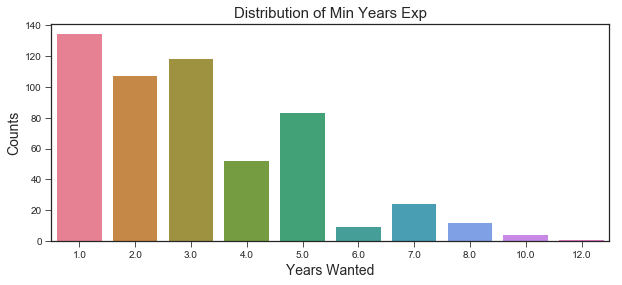

In [933]:
## Distribution of the Min Years of Experience WANTED

sns.set_style('ticks')
#Set Figure size
plt.figure(figsize=(10,4))

ax = sns.countplot(x="Min Years Exp", data=df_jobs, palette='husl')
ax.set_title('Distribution of Min Years Exp', fontsize=15)
ax.set_xlabel('Years Wanted', fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.show()

- Seem to have more demand for in the earlier years of experience.

#### Rank/Ordinal the Job Levels

In [934]:
df_jobs['Job Level'].value_counts()

Senior Executive    236
Junior Executive    148
Manager              70
Entry Level          36
Non-Executive        30
Senior Manager       24
Name: Job Level, dtype: int64

In [935]:
## Take the Average Salary per JOB LEVEL - This is just to have an idea to give it an ordinal rank
df_jobs.groupby('Job Level')['Mean Sal'].mean()

Job Level
Entry Level         3664.861111
Junior Executive    4384.560946
Manager             5399.175824
Non-Executive       4746.666667
Senior Executive    4975.445274
Senior Manager      7416.145833
Name: Mean Sal, dtype: float64

In [936]:
ranks = {'Entry Level': 1, 'Junior Executive': 2, 'Non-Executive': 3, 'Senior Executive': 4, 'Manager': 5, 'Senior Manager':6}

In [937]:
df_jobs['Job Level'] = df_jobs['Job Level'].map(ranks)

#### Check Correlations

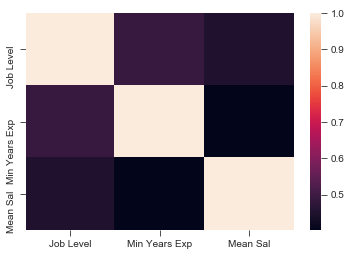

In [938]:
sns.heatmap(df_jobs.corr(method='pearson'))

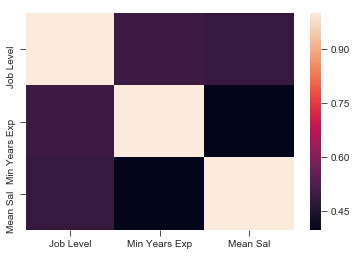

In [939]:
sns.heatmap(df_jobs.corr(method='spearman'))

- Salary (Mean Salary) and Min Years Exp are not correlated (Note that this is the overall, not industry specific)
- Job Level is correlated VERY WEAKLY with the Salary!

#### Check Mean Salary Distribution - np.log mean salary

In [940]:
df_jobs.head(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal
0,Career Edge Asia Pte Ltd,Senior Data Analyst ($7K - $8K / CBD/ MNC ) re...,Singapore - Across Singapore,NaN,Human Resources Management/Consulting,CAREER EDGE ASIA PTE LTD EA Licence Number ...,4,DA,3.0,7000.0


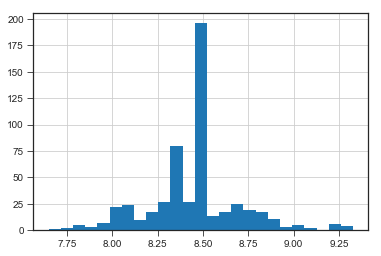

In [941]:
## Salary Distrib
df_jobs['Mean Sal'].apply(np.log).hist(bins=25)

In [942]:
import statsmodels.api as sm
import scipy.stats as stats

Text(0.5,1,u'Mean Sal - After Log')

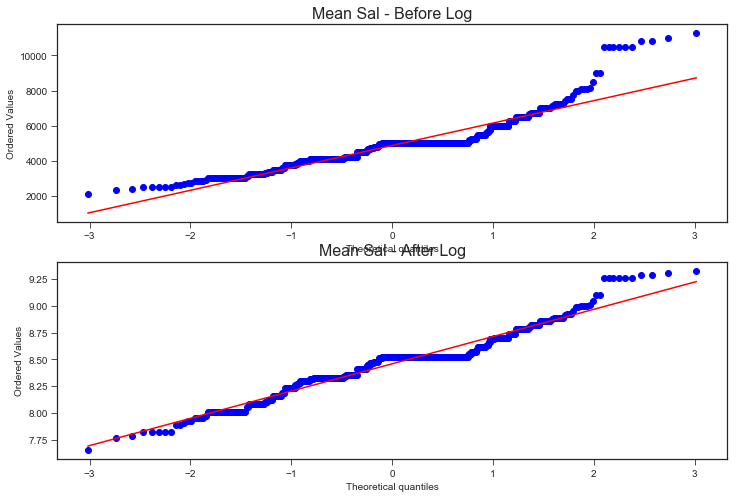

In [943]:
## Log Mean Sal ##

f, (ax1, ax2) = plt.subplots(2,figsize=(12,8))
res = stats.probplot(df_jobs['Mean Sal'], plot=ax1)
ax1.set_title('Mean Sal - Before Log', fontsize=16)

## NEW COLUMN - ['Log Mean Sal']
df_jobs['Log Mean Sal'] = np.log(df_jobs['Mean Sal'])
res = stats.probplot(df_jobs['Log Mean Sal'], plot=ax2)
ax2.set_title('Mean Sal - After Log', fontsize=16)

#### BACK UP

In [944]:
df_jobs.to_csv('Jobstreet_prep_pipeline.csv')

## Prepare Pipeline

In [1097]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score,precision_score, recall_score, auc, roc_curve,roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
## Import Regex
import re
import string

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, LabelBinarizer

# Import NLTK
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

# Import itertools
import itertools


In [1098]:
## TAKEN FROM SKLEARN WEBSITE:
### http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1099]:
## Custom Lemmatizer to Tokenzier
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [1100]:
df_jobs = pd.read_csv('Jobstreet_prep_pipeline.csv')
df_jobs.reset_index(drop=True, inplace=True)
df_jobs = df_jobs.drop('Unnamed: 0', axis=1)

df_jobs_tts = df_jobs.copy()

## Attempt Q1 - Model 1 - Linear Model to predict continuous

#### Custom Pipeline Function to Dummy Out the 'Industry' feature and the 'Base Title' feature

In [1101]:
class IndustryPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
    
    def _make_industry_dummies(self, df):
        df = pd.get_dummies(df, columns=['Industry'], drop_first=True)
        #print df.columns
        return df
    
    def transform(self, X, *args):
        X = self._make_industry_dummies(X)
        self.feature_names = X.columns  ## Keep Track of the Columns after Dummy Out
        return X
    def fit(self, X, *args):
        return self

In [1102]:
class JobBaseTitlePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
    
    def _make_basetitle_dummies(self, df):
        df = pd.get_dummies(df, columns=['Base Title'], drop_first=True)
        #print df.columns
        return df
    
    def transform(self, X, *args):
        X = self._make_basetitle_dummies(X)
        self.feature_names = X.columns  ## Keep Track of the Columns after Dummy Out
        return X
    def fit(self, X, *args):
        return self

#### Custom Item Selector for Feature Union

In [1103]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key, dt):
        self.key = key
        self.dt = dt

    def fit(self, x, y=None):
        # does nothing
        return self

    def transform(self, data_dict):
        # this returns the column requested
        print "Selecting",self.key
        if self.dt == 'text':
            return data_dict.loc[:,self.key]
        else:
            return data_dict.loc[:,[self.key]].astype(float)

#### Last Text Clean up

In [1104]:
df_jobs_tts['Base Title'] = df_jobs_tts['Base Title'].astype('category')
df_jobs_tts['Industry'] = df_jobs_tts['Industry'].astype('category')

In [1105]:
## Final Text Clean up
df_jobs_tts['JD'] = df_jobs_tts['JD'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('\d+', '') # for digits
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['JD'] = df_jobs_tts['JD'].str.replace('[\W_]+','') # only 

## Final Text Clean up
df_jobs_tts['Title'] = df_jobs_tts['Title'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('\d+', '') # for digits
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['Title'] = df_jobs_tts['Title'].str.replace('[\W_]+','') # only 


## Final Text Clean up
df_jobs_tts['Location'] = df_jobs_tts['Location'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('\d+', '') # for digits
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace(r'(\b\w{1,2}\b)', '') # for words
df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('[^\w\s]', '') # for punctuation 
#df_jobs_tts['Location'] = df_jobs_tts['Location'].str.replace('[\W_]+','') # only 


#### Train Test Split

In [1139]:
## PREP X - Everything LESS 'Log Mean Sal'
## PREP y - 'Log Mean Sal'

X = df_jobs_tts[[x for x in df_jobs_tts.columns if x not in ['Log Mean Sal','Mean Sal', 'Address', 'Company' ,'Title']]]
#X = df_jobs_tts.iloc[:,:df_jobs_tts.columns.get_loc("Log Mean Sal")] # Not Recommended -we lose everything else after.

y = df_jobs_tts['Log Mean Sal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [1140]:
print X_train.shape, y_train.shape
print y_train.shape, y_test.shape

(364, 7) (364,)
(364,) (180,)


In [1141]:
X.head(1)

,Location,Industry,JD,Job Level,Base Title,Min Years Exp,Sal Range
0,singapore across singapore,Human Resources Management/Consulting,career edge asia pte ltd licence number ...,4,DA,3.0,High


#### [BRUTE FORCING] Adding custom stop words (Spelling errors etc)

In [1147]:
from sklearn.feature_extraction import text 
my_additional_stop_words = ['acheivegroup','vanessa', 'reg','tan','wih', 'application', 'achievement', 'indicate',
                           'ambition', 'ackerman' ,'recruitment', 'ackermanglobal', 'draft', 'sell', 'acquire', 'dll',
                           'status' , 'project', 'refer', 'friend','linkedin','www','com','singapore', 'achieve', 'ha',
                           'requirement' , 'requirements', 'adapt','analyst','responsibility','monitoring','support'
                           'play' , 'skill' , 'monitored', 'refined' ,'clarify' ,'work',
                           'alvin' ,'wan','job','signal' , 'wei' ,'jie','able', 'regarding' ,'regardless' ,'month',
                           'possibility' , 'development', 'regard', 'monitor', 'hull', 'jen','new','build','process',
                           'refine', 'monday', 'ideally','use','budget','net','web','btiexecutivesearch','refers','actual',
                           'mon','tuesday','wednesday','thursday','friday','gender','refinement','mom','need',
                           'negotiation','bti','amendment','determines','refinement','kaki','bukit', 'molding','scope',
                           'negotiating','amended','tight','time','mohinani','lic','negotiate','negotiable','salary','region',
                           'monfri','neg','aws','love','module','quality','needto','ame','related','basis','loss','expect','expected',
                           'multitasks','detailsstrong','michael','availability','resume','leaving','rectify' ,'issue','recruitplus',
                           'techincal','nontechnical', 'review','including','defining','moderation','recruiting', 'sea', 'recruithaus',
                           'develops','recruitfirst','watsapp','willingness','whatsapp','email','willing','moderate','wide','variety',
                           'recruitexpress','capitagrp','capita','address','addressed','recruit','quinnoxsolutions','kindly',
                           'reusable', 'meet' ,'desired','returnoninvestment','visit','thatz','like','return','recovery','device','problem',
                           'resolution','whitebox','retrieved', 'sync' ,'hoc','whilst','west','working','day','retrieval','retaining' ,'using' ,'disclosing',
                           'wish','appl','lication','retain','disclose', 'personal','looking', 'hire','morgan','network', 'relies' ,'coordinate',
                           'near','real' ,'nrt','mrt','wellness','sport','holiday','navigation', 'behavior' ,'given',
                           'wellknown', 'established','wellestablished','nature','natural' ,'resource' ,'role', 'welcomed',
                           'problemsolving','nation' ,'goal','larc','welcome', 'successful','candidate' ,'needed' ,'participate',
                           'weekly' ,'monthly' ,'supporting', 'privacy' ,'policy' ,'consented' ,'uncertainty','associated',
                           'weng', 'hong', 'industry','necessary' ,'prepare', 'week', 'location','multitask', 'strong' ,'sense' ,'website', 'kellyservices',
                           'multisite', 'operation', 'involving' ,'record', 'leading', 'wenxing', 'license' ,'submitting','multiple', 'varied', 'source'
                           'extensible','architectural','reconstruction','navigating','reconciliation','navigate','reconciles', 'conflict' ,'dissects',
                           'software', 'extensible' ,'objective', 'reconcile', 'decompose', 'highlevel', 'smes', 'artc', 'unique','recommends', 'change', 'business',
                           'sme' ,'provide' ,'strategic', 'priority', 'soap', 'rest' ,'apis', 'recommending', 'presenting', 'exercise', 'maintan',
                           'socialurban', 'smartphone', 'app','developing','solution','exemplifying','reviewing', 'production',
                           'developer', 'develop','technically', 'implement','implement' ,'based', 'gathered' ,'regulatory','executive','search',
                           'impact', 'billion', 'patient', 'execution' ,'test' ,'idoc' ,'bapi' ,'experience', 'revenue','product',
                           'mandated','journal','technique','result', 'technical','team', 'unit', 'supported', 'fda', 'responsible' ,'support',
                           'nanyang', 'technological', 'university', 'target', 'track','apologize', 'modifies', 'tang','lee','response','maintain', 'low',
                           'nashmi', 'tcoms','moody','knowledge' ,'narrative', 'naive','tay','rewarded' , 'diagram prior', 'daily', 'taxonomy', 'diagram' ,'prior',
                            'taxkey' , 'perspective','mooc', 'refreshment', 'monthsinterested', 'reflect','underlying','present',
                           'monthjob','refining','knowhow','monthend','referal','greatly','broad','cycle','stage', 'cassandra', 'bringing',
                           'bring', 'revise', 'referral', 'fee', 'briefwe','closely', 'content','closely','area','tax', 'planning', 'affect', 'required', 'brief', 'client',
                           'bridge', 'utilizing' ,'advocate', 'fair' ,'reference' ,'user', 'tasksqualifications', 'ref', 'stafflink', 'brenntag', 'global',
                           'advisory', 'service','taskoriented', 'reestimates', 'management', 'breathing' ,'chronic', 'regret','school','kahsoon',
                           'jen','experiments','profile','reeracoen', 'pang','dan','lotus', 'brn', 'reward','dialogue', 'accounting','revamp','breakthrough', 'performance',
                           'learning', 'proficient', 'breaking', 'plan','retrieving','add','ass','added','retrieving','leaming','breakdown','shortlisted','skils','tcp',
                           'retrieve','dvantagejob','advantagejob','tasking','retrain','tasking','taskforce','retest','price', 'diagnostics','diagnostic','retention', 'tasked' ,'crossfunctional',
                           'task','workflow','targeting','retained','diagnosis','segmentation','retailer', 'partnering' ,'diabetes' ,'targeted' ,'target' ,'targetted', 'dhanushi', 'tap','large',
                           'retail', 'fmcg','breach','contractual','resultsdriven', 'environment','resultoriented','devops','brd','specification','tampines','resulting', 'resulted','talk','devise',
                           'talentreward','restriction','developmentrequirements','talented','talent', 'right', 'developmentplus','responsibilitieslead', 'brand','sku', 'talend','responsibilitiesengages',
                           'takasago','competitor','proposal','leaderto','physical','motivated','modern' ,'individual' ,'tailoring' ,'order','modelsdevelop','tailored',
                           'pursuant', 'dictionary','tactical','developmentminimum','tactic', 'developmenthave','developmentdevelop','tactful', 'developmentbased', 'developed','testing', 'determining' ,'program',
                           'determine', 'setup', 'detection', 'understanding', 'morganmckinley', 'mckinley' ,'myrepublic', 'reduce', 'annotation', 'cv','mxnet','customizing', 'rollout','redress','mutual', 'fund',
                           'redis','consent','connection','publication','professional','confidential','carry','produce','confidence','conducting', 'processing', 'professional','procedure','conduct',
                           'loh','rui', 'pte','murex' ,'advantage']
                
# my_additional_stop_words = []
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

#### Pipeline

In [1148]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            ('tfidf', TfidfVectorizer(stop_words=stop_words, ##Should not Brute force but ill try!
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 2),
                                      max_features=100000, max_df=0.9, min_df=1,
                                      norm='l2')),
            # ('tfidfvect', TfidfTransformer())
        ])),
    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('basetitle', JobBaseTitlePreprocessor()),  # Dummy Out
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
    ('eNet', ElasticNet(l1_ratio=0.0, alpha=0.001, max_iter=20))
])

In [1149]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
R2 = pl.score(X_test, y_test)
print("R2: ", R2)

Selecting Job Level
Selecting JD
Selecting Job Level
Selecting JD
('R2: ', 0.5000187553930189)


#### View the Coefs

In [1150]:
## This flow follows the Pipeline
dummy_cols = pl.named_steps['indus'].feature_names.tolist()
# Numeric Cols 
numeric_cols = ['Job Level']
# TDIDF FOR JD
jd_cols = pl.named_steps['union'].transformer_list[1][1].named_steps['tfidf'].get_feature_names()

X_train_csr_cols = dummy_cols + numeric_cols + jd_cols
X_train_csr_cols.remove('JD')

In [1151]:
#get strongest features affecting salary
coefs = list(zip(X_train_csr_cols, pl.named_steps['eNet'].coef_))
coefs = pd.DataFrame.from_records(coefs)
coefs['abs'] = abs(coefs[1])
print 'Top Positive Factors on Salary:'
print coefs[coefs[1] > 0].sort_values('abs', ascending=False).head(10)
print 
print 'Top Negative Factors on Salary:'
print coefs[coefs[1] < 0].sort_values('abs', ascending=False).head(10)
#http://www.cazaar.com/ta/econ113/interpreting-beta

Top Positive Factors on Salary:
                             0         1       abs
17085                  munging  0.237827  0.237827
7575                 detecting  0.202966  0.202966
16969     modelling systematic  0.182740  0.182740
20861         recruiter ensure  0.179137  0.179137
6417           data predictive  0.146606  0.146606
6095       customized possible  0.144756  0.144756
24676             tableau qlik  0.144729  0.144729
4499   communication proactive  0.132765  0.132765
14788        leadership proven  0.130005  0.130005
25933                   update  0.129501  0.129501

Top Negative Factors on Salary:
                         0         1       abs
21949          rule ensure -0.167594  0.167594
5290             contacted -0.148071  0.148071
26254        various party -0.123779  0.123779
20721  readiness cooperate -0.122210  0.122210
22017       sale financial -0.113066  0.113066
9547          event report -0.111366  0.111366
13138            indonesia -0.111301  0.11130

<p><strong>MODEL Q1A: Using a LINEAR model to Predict Salary</strong></p>
<h2><span style="background-color: #ffcc99;"><strong>( BAD MOVE ) - MODEL DOES NOT WORK :(</strong></span></h2>
<ul>
<li>Best result is approx 50%.</li>
<li>However the text/words from the NLP segment do not make any sense.</li>
<li>Essentially, <span style="text-decoration: underline;">they are words for us to take note of</span>.</li>
<li>Even after removing more words (by adding to the stop words), this model is unable to make sense of the 50%, let alone the missing 50% of what it doesn't explain</li>
<li>Conclusion is that, No one really uses NLP for Linear regession type of operations.</li>
</ul>

## Attempt Q1 - Model 2 - Predicting by Logistic Regression

In [1152]:
## QCut / Bin the Mean Salary

df_jobs_tts['Sal Range'] = pd.qcut(df_jobs_tts['Mean Sal'],3, labels=["Low","Mid","High"])

In [1153]:
df_jobs_tts.groupby('Sal Range')['Mean Sal'].agg(['min', 'max'])

## Low Salary Range = $2100 - $4230.82
## Mid Salary Range = $4250 - $5000
## High Salary Range = $5100 and UP ($11250)

,min,max
Sal Range,,
Low,2100.0,4230.817461
Mid,4250.0,5000.000000
High,5100.0,11250.000000


In [1154]:
df_jobs_tts['Sal Range'].value_counts()

Mid     234
Low     187
High    123
Name: Sal Range, dtype: int64

In [1155]:
df_jobs_tts.head(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal,Log Mean Sal,Sal Range
0,Career Edge Asia Pte Ltd,senior data analyst cbd mnc ref,singapore across singapore,NaN,Human Resources Management/Consulting,career edge asia pte ltd licence number ...,4,DA,3.0,7000.0,8.853665,High


In [1156]:
#LabelEncoder().fit_transform(y)

In [1184]:
## PREP X - Everything LESS 'Log Mean Sal', 'Address', 'Company' ,'Title'
## PREP y - 'Sal Range'

X = df_jobs_tts[[x for x in df_jobs_tts.columns if x not in ['Log Mean Sal','Min Years Exp', 'Location','Mean Sal', 'Address', 'Company' ,'Title','Sal Range']]]

y = df_jobs_tts['Sal Range']
#y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [1185]:
X.isnull().sum()

Industry      0
JD            0
Job Level     0
Base Title    0
dtype: int64

#### Q1B Pipeline

In [1186]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            ('tfidf', TfidfVectorizer(stop_words=stop_words,
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 2),
                                      max_features=50000, max_df=0.9, min_df=1,
                                      norm='l2')),
            # ('tfidfvect', TfidfTransformer())
        ])),
    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('basetitle', JobBaseTitlePreprocessor()),  # Dummy Out
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
    ('logreg', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
         intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
         penalty='l2', random_state=None, solver='saga', tol=0.0001,
         verbose=0, warm_start=False))
    #('gbc', GradientBoostingClassifier(random_state=42, max_features='auto', max_depth=6, n_estimators=200))
])

Selecting Job Level
Selecting JD
----------------------------------------
--------- Classfication Report ------------
Selecting Job Level
Selecting JD
             precision    recall  f1-score   support

       High       0.77      0.24      0.37        41
        Low       0.80      0.66      0.73        62
        Mid       0.59      0.90      0.72        77

avg / total       0.71      0.67      0.64       180

----------------------------------------
--------- Confusion Matrix ------------
Selecting Job Level
Selecting JD
Confusion matrix, without normalization
[[10  5 26]
 [ 0 41 21]
 [ 3  5 69]]


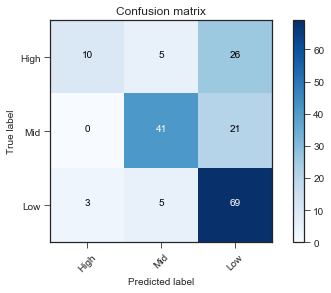

In [1187]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy

print('-'*40)
print '--------- Classfication Report ------------'
print classification_report(y_test, pl.predict(X_test))
print('-'*40)
print '--------- Confusion Matrix ------------'
plot_confusion_matrix(confusion_matrix(y_test, pl.predict(X_test)), ['High','Mid','Low'])

<p><strong>MODEL Q1B: Using a Logistic Regression model to Predict Salary Groups (Low, Mid, High)</strong></p>
<ul>
<li>Best result is approx 67%</li>
<li>Salary Ranges:
<ul>
<li>Low Salary Range = $2100 - $4230.8</li>
<li>Mid Salary Range = $4250 - $5000</li>
<li>High Salary Range = $5100 and UP ($11250)</li>
</ul>
</li>
<li>
<pre>             precision    recall  f1-score   support

       High       0.77      0.24      0.37        41
        Low       0.80      0.66      0.73        62
        Mid       0.59      0.90      0.72        77

avg / total       0.71      0.67      0.64       180</pre>
</li>
<li>Thankfully, it predicts the Low and the Mid range salary brackets decently.</li>
</ul>

#### Lets see the coefficients

In [1188]:
## This flow follows the Pipeline
dummy_cols = pl.named_steps['indus'].feature_names.tolist()
# Numeric Cols 
numeric_cols = ['Job Level']
# TDIDF FOR JD
jd_cols = pl.named_steps['union'].transformer_list[1][1].named_steps['tfidf'].get_feature_names()

X_train_csr_cols = dummy_cols + numeric_cols + jd_cols

X_train_csr_cols.remove('JD')

In [1189]:
results_dict = {}
for i in range(len(pl.named_steps['logreg'].coef_[0])):
       results_dict[X_train_csr_cols[i]] = [pl.named_steps['logreg'].coef_[0][i],pl.named_steps['logreg'].coef_[1][i],pl.named_steps['logreg'].coef_[2][i]]

multi_coef = pd.DataFrame.from_dict(results_dict)
multi_coef = multi_coef.T
multi_coef.columns = ["Low","Mid","High"]

In [1190]:
## Top 10 Features for LOW Salary
## Low Salary Range = $2100 - $4230.82

multi_coef.sort_values('Low', ascending=False)[['Low']].head(10)

,Low
uob digital,0.459619
designing innovative,0.332606
convey concept,0.332606
building optimizing,0.316432
notified listed,0.311994
framework streamline,0.303652
mnc hvac,0.303440
wen,0.298908
arising marketing,0.297037
arising transition,0.297037


In [1191]:
## Top 10 Features for MID Salary
## Mid Salary Range = $4250 - $5000

multi_coef.sort_values('Mid', ascending=False)[['Mid']].head(10)

,Mid
daphneong,0.586769
run assigned,0.425987
join description,0.405660
industrial engineering,0.403861
level maintains,0.397617
alongside stakeholder,0.378304
manager subject,0.374972
intensive,0.371359
assumption successfully,0.370012
indonesia,0.368255


In [1192]:
## Top 10 Features for HIGH Salary
## High Salary Range = $5100 and UP ($11250)

multi_coef.sort_values('High', ascending=False)[['High']].head(10)

,High
creating internal,0.669775
improvement opportunity,0.496089
report marketing,0.491946
long,0.389200
creating opportunity,0.339221
standard data,0.339221
activity truly,0.339221
presentation enjoy,0.339221
presentation dissemination,0.339221
efficiently producing,0.339221


<p><strong>Conclusion - in the report below..&nbsp;</strong></p>
<p><strong>Short summary for Q1 - I wouldn't trust it to predict salary.</strong></p>

## Attempt Q2 - Model 1 - Gradient Boosting Classifier

In [1193]:
df_jobs_tts.head(1)

,Company,Title,Location,Address,Industry,JD,Job Level,Base Title,Min Years Exp,Mean Sal,Log Mean Sal,Sal Range
0,Career Edge Asia Pte Ltd,senior data analyst cbd mnc ref,singapore across singapore,NaN,Human Resources Management/Consulting,career edge asia pte ltd licence number ...,4,DA,3.0,7000.0,8.853665,High


In [1194]:
## PREP X - 'Everything LESS 'Base Title','Log Mean Sal','Min Years Exp', 'Location','Address', 'Title','Company','Sal Range'
## PREP y - 'Base Title'

X = df_jobs_tts[[x for x in df_jobs_tts.columns if x not in ['Base Title','Log Mean Sal','Min Years Exp', 'Location','Address', 'Title','Company','Sal Range']]]

y = df_jobs_tts['Base Title']
#y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [1195]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('MeanSal', Pipeline([
            ('selector', ItemSelector(key='Mean Sal', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            ('tfidf', TfidfVectorizer(stop_words=stop_words,
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 2),
                                      max_features=100000, max_df=0.9, min_df=1,
                                      norm='l2')),
        ])),

    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
#     ('logreg', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='saga', tol=0.0001,
#          verbose=0, warm_start=False))
    ('gbc', GradientBoostingClassifier(random_state=42, max_features='auto', max_depth=7, n_estimators=500))
])

Selecting Job Level
Selecting Mean Sal
Selecting JD
----------------------------------------
--------- Classfication Report ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
             precision    recall  f1-score   support

         BA       0.87      0.83      0.85        82
         BI       0.77      0.71      0.74        14
         DA       0.64      0.78      0.70        45
      DArch       1.00      1.00      1.00         1
         DE       0.50      0.33      0.40         3
         DS       0.77      0.69      0.73        35

avg / total       0.78      0.77      0.77       180

----------------------------------------
--------- Confusion Matrix ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
Confusion matrix, without normalization
[[68  0 10  0  1  3]
 [ 2 10  2  0  0  0]
 [ 4  2 35  0  0  4]
 [ 0  0  0  1  0  0]
 [ 0  0  2  0  1  0]
 [ 4  1  6  0  0 24]]


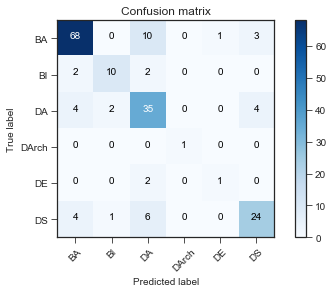

In [1197]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
print('-'*40)
print '--------- Classfication Report ------------'
print classification_report(y_test, pl.predict(X_test))
print('-'*40)
print '--------- Confusion Matrix ------------'
plot_confusion_matrix(confusion_matrix(y_test, pl.predict(X_test)), ['BA','BI','DA','DArch','DE','DS'])

<p><strong>MODEL Q2A: Using a Gradient Boosted Classifier model to Predict Base Titles</strong></p>
<ul>
<li>Best result is approx 77%</li>
<li>Base Titles:
<ul>
<li>BA = Business Analyst</li>
<li>BI = Business Intelligence</li>
<li>DA = Data Analyst</li>
<li>DArch = Data Architect</li>
<li>DE = Data Engineer</li>
<li><strong>DS = Data Scientist</strong></li>
</ul>
</li>
<li>Given that the classes are slightly imbalanced - given a 69% on the DS label (24/34) is a good sign</li>
<li>
<pre>             precision    recall  f1-score   support

         BA       0.87      0.83      0.85        82
         BI       0.77      0.71      0.74        14
         DA       0.64      0.78      0.70        45
      DArch       1.00      1.00      1.00         1
         DE       0.50      0.33      0.40         3
         <strong>DS       0.77      0.69      0.73        35</strong>

avg / total       0.78      0.77      0.77       180</pre>
</li>
<li>THIS ISNT IT! - We need to see ONE VS ALL !</li>
</ul>

#### ONE VS ALL Approach to find out what contributes to DS!

In [1198]:
## CREATE A NEW FEATURE TO TARGET IS_DS
df_jobs_tts['IS_DS'] = df_jobs_tts['Base Title'].apply(lambda x: 'DS' if x == 'DS' else 'OTHERS')

In [1199]:
## PREP X - 'Everything LESS 'Base Title','Log Mean Sal','Min Years Exp', 'Location','Address', 'Title','Company','Sal Range'
## PREP y - 'IS_DS'

X = df_jobs_tts[[x for x in df_jobs_tts.columns if x not in ['Base Title','Log Mean Sal','Min Years Exp', 'Location','Address', 'Title','Company','Sal Range']]]

y = df_jobs_tts['IS_DS']
#y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [1207]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('MeanSal', Pipeline([
            ('selector', ItemSelector(key='Mean Sal', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            ('tfidf', TfidfVectorizer(stop_words=stop_words,
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 2),
                                      max_features=100000, max_df=0.9, min_df=1,
                                      norm='l2')),
        ])),

    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
#     ('logreg', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='saga', tol=0.0001,
#          verbose=0, warm_start=False))
    ('gbc', GradientBoostingClassifier(random_state=42, max_features='auto', max_depth=8, n_estimators=1000))
])

Selecting Job Level
Selecting Mean Sal
Selecting JD
----------------------------------------
--------- Classfication Report ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
             precision    recall  f1-score   support

         DS       0.76      0.82      0.79        34
     OTHERS       0.96      0.94      0.95       146

avg / total       0.92      0.92      0.92       180

----------------------------------------
--------- Confusion Matrix ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
Confusion matrix, without normalization
[[ 28   6]
 [  9 137]]


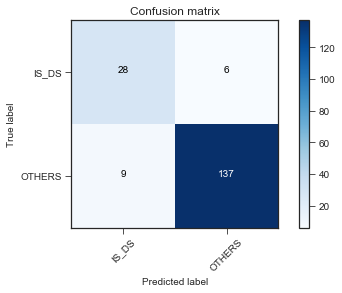

In [1208]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
print('-'*40)
print '--------- Classfication Report ------------'
print classification_report(y_test, pl.predict(X_test))
print('-'*40)
print '--------- Confusion Matrix ------------'
plot_confusion_matrix(confusion_matrix(y_test, pl.predict(X_test)), ['IS_DS','OTHERS'])

<p><span style="color: #0000ff;"><strong>MODEL Q2A: Using a Gradient Boosted Classifier model to Predict IS_DS</strong></span></p>
<ul>
<li>Best result is approx 82%</li>
<li>Base Titles:
<ul>
<li>OTHERS = BA, DA, BI, DArch, DE</li>
<li><strong>DS = Data Scientist</strong></li>
</ul>
</li>
<li>Given that the classes are <span style="text-decoration: underline;">very imbalanced</span> - given a 82% on the DS label (28/34) is a decently good sign</li>
<li>
<pre>             precision    recall  f1-score   support

         DS       0.76      0.82      0.79        34
     OTHERS       0.96      0.94      0.95       146

avg / total       0.92      0.92      0.92       180</pre>
</li>
<li>NOW we can see the feature importance for DS~</li>
</ul>

#### As this is using a GradientBoostedClassifier we can see the Feature importances

In [1209]:
## This flow follows the Pipeline
dummy_cols = pl.named_steps['indus'].feature_names.tolist()
# Numeric Cols 
numeric_cols = ['Job Level' , 'Mean Sal']
# TDIDF FOR JD
jd_cols = pl.named_steps['union'].transformer_list[2][1].named_steps['tfidf'].get_feature_names()

X_train_csr_cols = dummy_cols + numeric_cols + jd_cols

X_train_csr_cols.remove('JD')

In [1210]:
# Top 10 Features based on Importance
coefs = list(zip(X_train_csr_cols, pl.named_steps['gbc'].feature_importances_))
coefs = pd.DataFrame.from_records(coefs)
coefs.columns = ['Feature','Importance']
coefs.sort_values('Importance', ascending=False)[['Feature', 'Importance']].head(10)

,Feature,Importance
15503,look future,0.034635
19012,personnel licence,0.013596
11543,getting interested,0.007459
14317,itc attention,0.005451
2589,ave,0.003025
6160,dashboard extensive,0.001608
23534,smu,0.001293
1417,analytical highly,0.001089
25708,trade,0.001042
23358,sign ensure,0.001035


In [1211]:
## Bottom 10 Features
coefs.sort_values('Importance', ascending=False)[['Feature', 'Importance']].tail(10)

,Feature,Importance
9192,ensure end,0.0
9191,ensure effective,0.0
9190,ensure documentation,0.0
9189,ensure document,0.0
9188,ensure design,0.0
9187,ensure delivery,0.0
9186,ensure delivered,0.0
9185,ensure deliverable,0.0
9184,ensure definition,0.0
27414,yield,0.0


## Attempt Q2 - Model 2 - Predicting by Random Forest Classifier

In [1214]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('JobLevel', Pipeline([
            ('selector', ItemSelector(key='Job Level', dt='num'))
        ])),
        ('MeanSal', Pipeline([
            ('selector', ItemSelector(key='Mean Sal', dt='num'))
        ])),
        ('JD', Pipeline([
            ('selector', ItemSelector(key='JD', dt='text')),
            ('tfidf', TfidfVectorizer(stop_words=stop_words,
                                      tokenizer=LemmaTokenizer(),
                                      lowercase=True,
                                      use_idf=True, ngram_range=(1, 2),
                                      max_features=100000, max_df=0.9, min_df=1,
                                      norm='l2')),
        ])),

    ],
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('indus', IndustryPreprocessor()),  # Dummy Out
    ('union', process_and_join_features),
    ('rfc', RandomForestClassifier(random_state=42, max_features=5000, max_depth=7, n_estimators=1000, bootstrap=True))
])

Selecting Job Level
Selecting Mean Sal
Selecting JD
----------------------------------------
--------- Classfication Report ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
             precision    recall  f1-score   support

         DS       0.81      0.85      0.83        34
     OTHERS       0.97      0.95      0.96       146

avg / total       0.94      0.93      0.93       180

----------------------------------------
--------- Confusion Matrix ------------
Selecting Job Level
Selecting Mean Sal
Selecting JD
Confusion matrix, without normalization
[[ 29   5]
 [  7 139]]


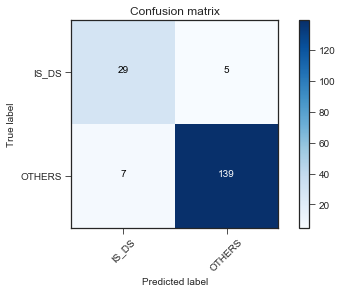

In [1215]:
# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
print('-'*40)
print '--------- Classfication Report ------------'
print classification_report(y_test, pl.predict(X_test))
print('-'*40)
print '--------- Confusion Matrix ------------'
plot_confusion_matrix(confusion_matrix(y_test, pl.predict(X_test)), ['IS_DS','OTHERS'])

<p><span style="color: #0000ff;"><strong>MODEL Q2B: Using a Random Forest Classifier model to Predict IS_DS</strong></span></p>
<ul>
<li>Best result is approx 85%</li>
<li>Base Titles:
<ul>
<li>OTHERS = BA, DA, BI, DArch, DE</li>
<li><strong>DS = Data Scientist</strong></li>
</ul>
</li>
<li>Given that the classes are <span style="text-decoration: underline;">very imbalanced</span> - given a 85% on the DS label (29/34) is a pretty good sign <strong>(Out Performing Gradient Boosted Classifier just by a tiny bit)</strong></li>
<li>
<pre>             precision    recall  f1-score   support

         DS       0.81      0.85      0.83        34
     OTHERS       0.97      0.95      0.96       146

avg / total       0.94      0.93      0.93       180</pre>
</li>
<li>NOW we can see the feature importance for DS~</li>
</ul>

In [1216]:
## This flow follows the Pipeline
dummy_cols = pl.named_steps['indus'].feature_names.tolist()
# Numeric Cols 
numeric_cols = ['Job Level' , 'Mean Sal']
# TDIDF FOR JD
jd_cols = pl.named_steps['union'].transformer_list[2][1].named_steps['tfidf'].get_feature_names()

X_train_csr_cols = dummy_cols + numeric_cols + jd_cols

X_train_csr_cols.remove('JD')

In [1217]:
# Top 10 Features based on Importance
coefs = list(zip(X_train_csr_cols, pl.named_steps['rfc'].feature_importances_))
coefs = pd.DataFrame.from_records(coefs)
coefs.columns = ['Feature','Importance']
coefs.sort_values('Importance', ascending=False)[['Feature', 'Importance']].head(10)

,Feature,Importance
15503,look future,0.132249
19012,personnel licence,0.131770
20608,purchasing,0.048347
888,agreed term,0.046897
22511,schedule assist,0.027916
16951,mnc opportunity,0.026982
6452,data principle,0.020750
19015,personnel pei,0.019011
22606,science medical,0.017572
6739,decision cooperation,0.009822


In [1218]:
## Bottom 10 Features
coefs.sort_values('Importance', ascending=False)[['Feature', 'Importance']].tail(10)

,Feature,Importance
9742,excellent relationship,0.0
9741,excellent quantitative,0.0
9740,excellent programming,0.0
9739,excellent presentation,0.0
9738,excellent player,0.0
9737,excellent performing,0.0
9736,excellent organizing,0.0
9735,excellent oral,0.0
9734,excellent opportunity,0.0
27414,yield,0.0


## REPORT

### Scraping the Data

<h3>Source:</h3>
<ul>
<li>Webstite to scrape: <a href="http://www.jobstreet.com">www.jobstreet.com</a></li>
<li>Required: Login + scraping twice</li>
<li>Scrape once with the search terms Data, Data Scientist, Data Analyst, Business Analyst and Business Intelligence.</li>
<li>Scrape gathered approx 2500 entries.</li>
<li>General idea was to scrape as much first and then filter into the job types/categories etc</li>
</ul>
<h3>Tech:</h3>
<ul>
<li>Jobstreet was sensitive to using the request library. It blocked the scrape.</li>
<li>We have to use Selenium as it will extract from the 'surface' of the page.</li>
<li>Selenium allows us to 'send keys' and 'click buttons' - allowing for logins</li>
</ul>
<h3>Challenge: Information dilution/null/corruption issues</h3>
<ul>
<li>The website allowed us to pull
<ul>
<li>Company
<ul>
<li>Problems: There were a huge majority that were Recruitment firms which diluted the data. Recruiters do not publish the companies they are hiring for, and not all of them put the industry that they are hiring for. They usually also put 'None' for salary and other fields that makes it misleading.</li>
</ul>
</li>
<li>Title
<ul>
<li>Some of them stuff more information, or dilute the job title. ie. They put the salary ranges etc inside this field</li>
</ul>
</li>
<li>Address
<ul>
<li>Can be left blank or filled with other info and incomplete info</li>
</ul>
</li>
<li>Location
<ul>
<li>Singapore, West East etc,. however it is quite a useless feature also due to blanks/incomplete info etc.</li>
</ul>
</li>
<li>Seniority
<ul>
<li>The usual norm for jobsteet is that they put 'Min 3 Years (Junior Executive)' - so from this we can extract the Min Years Experience and the Job Level - so this feature is ok.</li>
</ul>
</li>
<li>Industry
<ul>
<li>Since the majority are recruitment firms; the industry for more than 50% of the data is 'HR Consulting' or 'Recruitment' - further diluting the data.</li>
</ul>
</li>
<li>Salary
<ul>
<li>Data comes in a range ie. 4000-5000, some things to take note of, it is SGD some entries are MYR (malaysian companies advertise in SG on jobstreet)</li>
</ul>
</li>
<li>Job Description
<ul>
<li>MAJOR PROBLEM HERE: Since jobstreet doesnt have a Requirements field/box, all entries lump of this info together in this one box. The clauses etc of the companies/recruitment firms, sign offs etc are all lumped here.</li>
<li>I would say that because of this, the data is severely diluted.</li>
</ul>
</li>
</ul>
</li>
</ul>
<p>&nbsp;</p>

<h3>Cleaning the Data (Iterative process)</h3>
<ul>
<li>Cleaning the data isn't a 1 stop process
<ul>
<li>Clean</li>
<li>Try out model</li>
<li>Iterate</li>
<li>Clean again</li>
<li>Repeat</li>
</ul>
</li>
<li>Removal of duplicates
<ul>
<li>At many entries of the same job, by the same company, however may be at different times.</li>
</ul>
</li>
<li>HTML tags, punctuations
<ul>
<li>As Jobstreet allows for HTML embedding, apart from using beautiful soup to extract the text, there is embedded html within it.</li>
<li>Punctuations are also removed as they may affect the text vectorizers (Count and TFIDF)</li>
</ul>
</li>
<li>Re-Categorizing
<ul>
<li>As many of the job postings are by recruitment firms, the Industry category that it is filed under on jobstreet's website would fall under 'HR/Consulting/Recruiting'</li>
<li>This is a mis-alignment because they job that they are posting for may be of a different industry. ie. 'Finance' may be the real industry of the job posted.</li>
</ul>
</li>
<li>Imputations
<ul>
<li>Certain data can be imputed, such a Job Level - can be extracted from the Job Description body of text</li>
<li>The same goes for missing salary data.</li>
</ul>
</li>
</ul>

<h3>Predicting Salary Data</h3>
<ul>
<li>Using a Pipeline object from SKLearn
<ul>
<li>Reduce the 'manual' process of dummying out and text vectorization</li>
<li>Maintain the form of the initial dataframe</li>
<li>Learnt to write/use the custom functions for the pipeline, for easier replication of process.</li>
</ul>
</li>
<li>Model 1A - Linear Reg
<ul>
<li>Used an ElasticNet to try and 'get the best of both worlds' of Lasso and Ridge, however 100% Ridge seemed the way to go.</li>
<li>Max was a 50%</li>
<li>Using NLP to predict a continous variable as the target seemed to work very poorly.</li>
</ul>
</li>
<li>Model 1B - Logistic Reg
<ul>
<li>As the results were poor from predicting a continuous variable, i changed the target to a categorical.</li>
<li>QCut the salary target to Low, Mid, High.</li>
<li>Hitting about a 67% and&nbsp;</li>
<li>Thankfully, it predicts the Low and the Mid range salary brackets decently (Looking at the F1 and Recall scores)</li>
</ul>
</li>
<li>Keywords and Interpretability
<ul>
<li>The keywords / coefficients of the model (1A and 1B) are not really interpretable.</li>
<li>The data faced alot of challenges, and that would have affected the 'quality' of keywords that are affecting the salary.</li>
</ul>
</li>
</ul>

<h3>Predicting Factors for Data Science jobs</h3>
<ul>
<li>Using a Pipeline object from SKLearn (same from above)
<ul>
<li>Reduce the 'manual' process of dummying out and text vectorization</li>
<li>Maintain the form of the initial dataframe</li>
<li>Learnt to write/use the custom functions for the pipeline, for easier replication of process.</li>
</ul>
</li>
<li>Model 2A - Gradient Boosting Classifier
<ul>
<li>Given that the classes are slightly imbalanced - given a 69% on the DS label (24/34) is a good sign</li>
<li>However this isn't the appropriate way - we need to see the factors from a One Vs Rest approach</li>
<li>Best result is approx 82%</li>
<li>Base Titles:
<ul>
<li>OTHERS = BA, DA, BI, DArch, DE</li>
<li><strong>DS = Data Scientist</strong></li>
</ul>
</li>
<li>Given that the classes are&nbsp;very imbalanced&nbsp;- given a 82% on the DS label (28/34) is a decently good sign!</li>
</ul>
</li>
<li>Model 2B - Random Forest Classifier
<ul>
<li>Best result is approx 85%</li>
<li>Base Titles:
<ul>
<li>OTHERS = BA, DA, BI, DArch, DE</li>
<li><strong>DS = Data Scientist</strong></li>
</ul>
</li>
<li>Given that the classes are&nbsp;very imbalanced&nbsp;- given a 85% on the DS label (29/34) is a pretty good sign&nbsp;<strong>(Out Performing Gradient Boosted Classifier just by a tiny bit)</strong></li>
</ul>
</li>
<li>Keywords and Interpretability
<ul>
<li>The keywords / coefficients of the model (2A and 2B) are not really interpretable.</li>
<li>The data faced alot of challenges, and that would have affected the 'quality' of keywords that are affecting the salary.</li>
</ul>
</li>
</ul>

<h3>Conclusion</h3>
<ul>
<li>Given more time, I would have
<ul>
<li><strong>NOT USED JOBSTREET AS THE MAIN SOURCE</strong></li>
<li>Better data cleaning of the text features to bring out more interpretability.</li>
<li>Dropped all Recruiter's postings, only get Direct Employment postings.</li>
<li>Take more Vitamins and don't fall sick in the midst of project 4!</li>
</ul>
</li>
</ul>